In [369]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 

## Load data

In [370]:
red = pd.read_csv("winequality-red.csv",sep=";")
red_low = red[red["quality"]<=4]
red_high = red[red["quality"]>=7]

## Sample normal distributions of 1599, 63 and 217 samples, which correspond to all red wines, low-quality red wines and high-quality red wines respectively.

In [371]:
normal_1599 = np.random.normal(red["pH"].mean(),red["pH"].std(),1599)
normal_63 = np.random.normal(red_low["pH"].mean(),red_low["pH"].std(),63)
normal_217 = np.random.normal(red_high["pH"].mean(),red_high["pH"].std(),217)

## Part 1: Plots

### Histograms

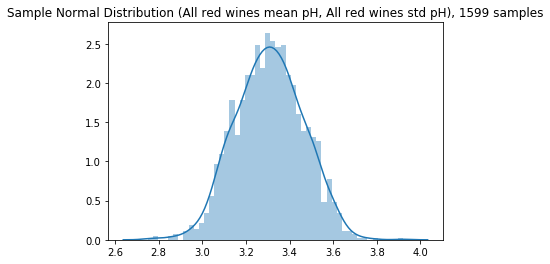

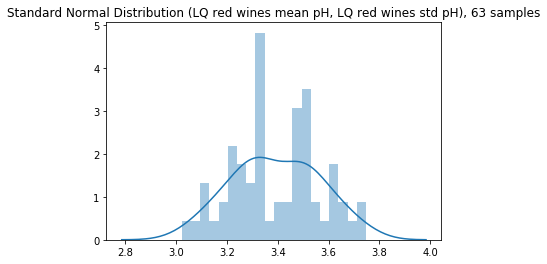

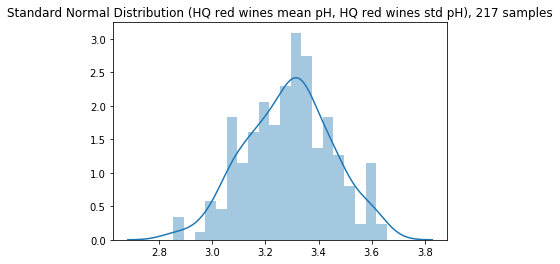

In [372]:
sbn.distplot(normal_1599,bins=50)
plt.title("Sample Normal Distribution (All red wines mean pH, All red wines std pH), 1599 samples")
plt.show()

sbn.distplot(normal_63,bins=20)
plt.title("Standard Normal Distribution (LQ red wines mean pH, LQ red wines std pH), 63 samples")
plt.show()

sbn.distplot(normal_217,bins=20)
plt.title("Standard Normal Distribution (HQ red wines mean pH, HQ red wines std pH), 217 samples")
plt.show()

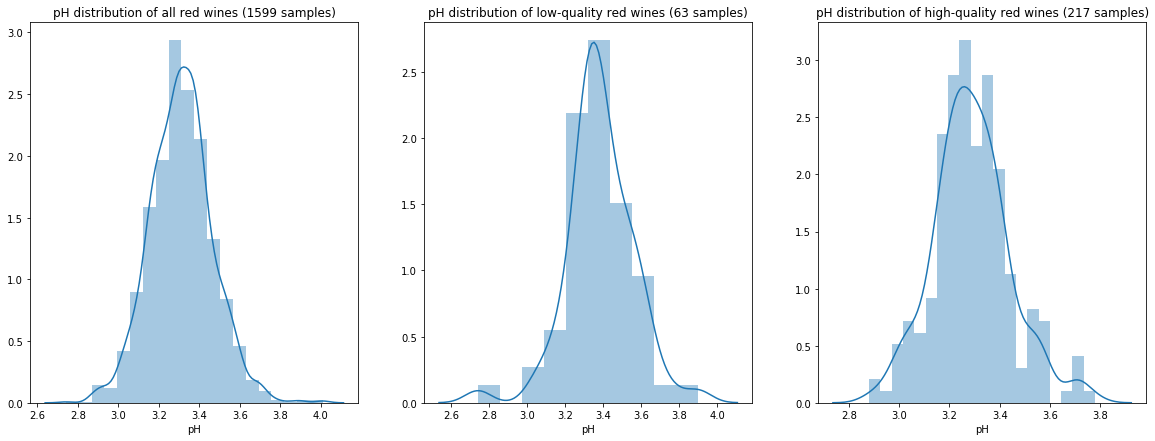

In [373]:
plt.figure(figsize=[20,7])

plt.subplot(1,3,1)
sbn.distplot(red["pH"],bins=20)
plt.title("pH distribution of all red wines (1599 samples)")

plt.subplot(1,3,2)
sbn.distplot(red_low["pH"],bins=10)
plt.title("pH distribution of low-quality red wines (63 samples)")

plt.subplot(1,3,3)
sbn.distplot(red_high["pH"],bins=20)
plt.title("pH distribution of high-quality red wines (217 samples)")

plt.show()

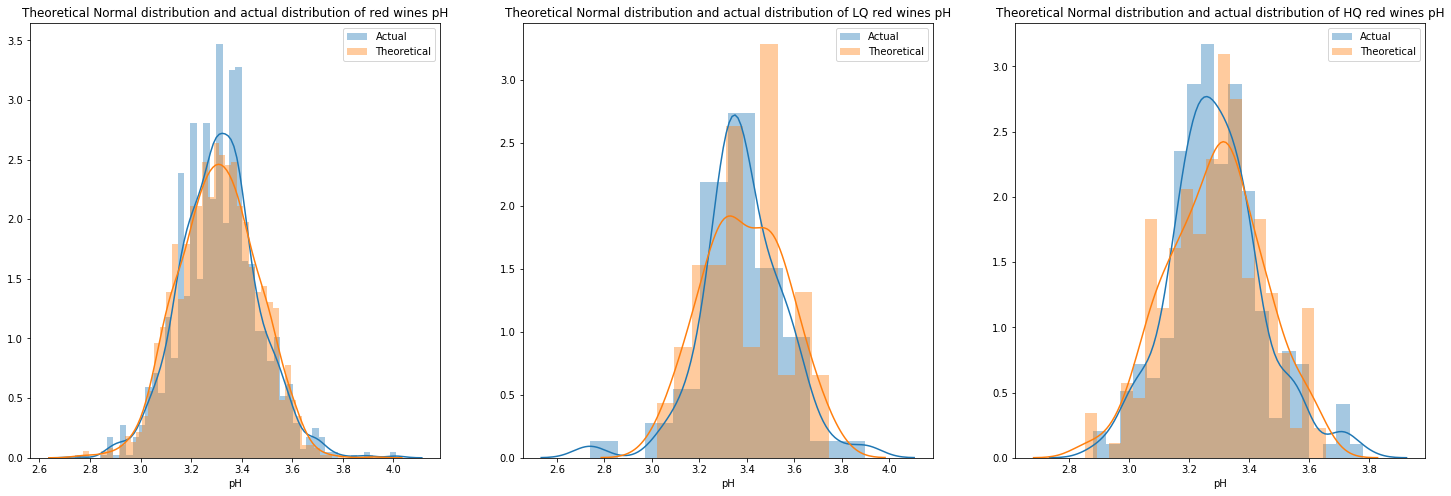

In [374]:
plt.figure(figsize=[25,8])

plt.subplot(1,3,1)
sbn.distplot(red["pH"],bins=50,label="Actual")
sbn.distplot(normal_1599,bins=50,label="Theoretical")
plt.title("Theoretical Normal distribution and actual distribution of red wines pH")
plt.legend()

plt.subplot(1,3,2)
sbn.distplot(red_low["pH"],bins=10,label="Actual")
sbn.distplot(normal_63,bins=10,label="Theoretical")
plt.title("Theoretical Normal distribution and actual distribution of LQ red wines pH")
plt.legend()

plt.subplot(1,3,3)
sbn.distplot(red_high["pH"],bins=20,label="Actual")
sbn.distplot(normal_217,bins=20,label="Theoretical")
plt.title("Theoretical Normal distribution and actual distribution of HQ red wines pH")
plt.legend()

plt.show()

### CDF plots

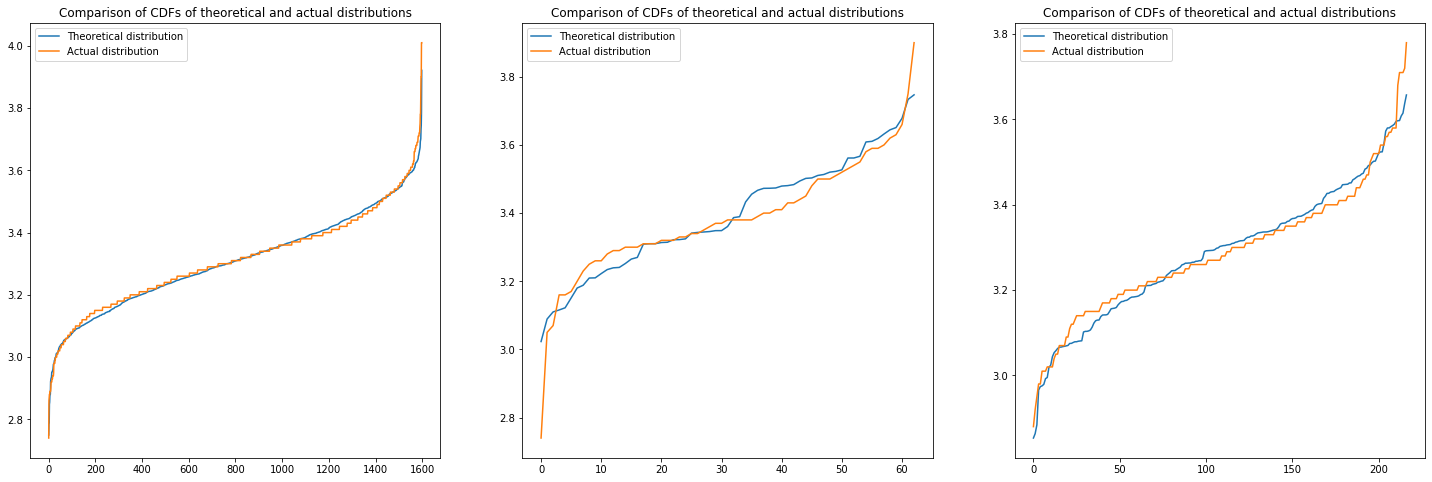

In [375]:
normal_1599.sort()
normal_63.sort()
normal_217.sort()

plt.figure(figsize=[25,8])

plt.subplot(1,3,1)
plt.plot(normal_1599,label="Theoretical distribution")
plt.plot(sorted(red["pH"]),label="Actual distribution")
plt.title("Comparison of CDFs of theoretical and actual distributions")
plt.legend()

plt.subplot(1,3,2)
plt.plot(normal_63,label="Theoretical distribution")
plt.plot(sorted(red_low["pH"]),label="Actual distribution")
plt.title("Comparison of CDFs of theoretical and actual distributions")
plt.legend()

plt.subplot(1,3,3)
plt.plot(normal_217,label="Theoretical distribution")
plt.plot(sorted(red_high["pH"]),label="Actual distribution")
plt.title("Comparison of CDFs of theoretical and actual distributions")
plt.legend()

plt.show()

### Q-Q plots

In [376]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import probplot

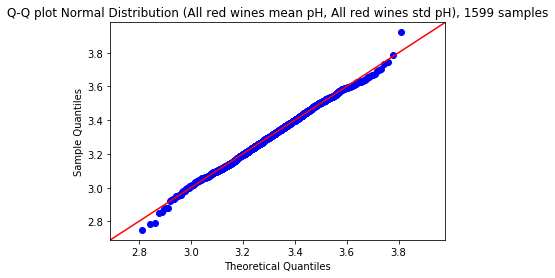

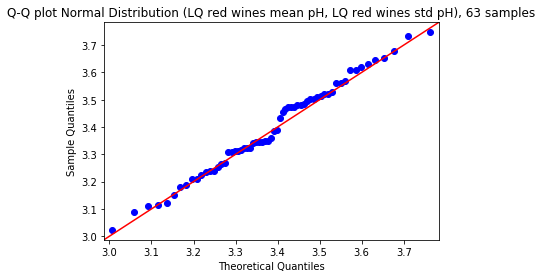

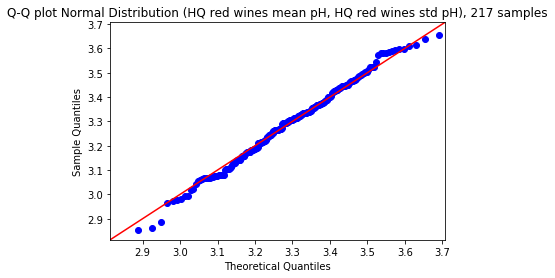

In [377]:
sm.qqplot(normal_1599,dist=norm(red["pH"].mean(),red["pH"].std()),line="45")
plt.title("Q-Q plot Normal Distribution (All red wines mean pH, All red wines std pH), 1599 samples")
sm.qqplot(normal_63,dist=norm(red_low["pH"].mean(),red_low["pH"].std()),line="45")
plt.title("Q-Q plot Normal Distribution (LQ red wines mean pH, LQ red wines std pH), 63 samples")
sm.qqplot(normal_217,dist=norm(red_high["pH"].mean(),red_high["pH"].std()),line="45")
plt.title("Q-Q plot Normal Distribution (HQ red wines mean pH, HQ red wines std pH), 217 samples")
plt.show()

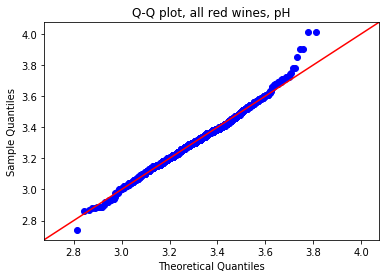

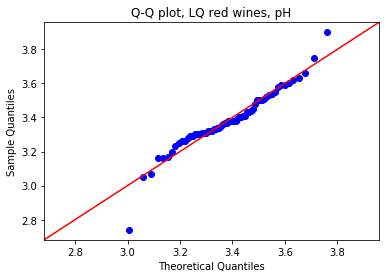

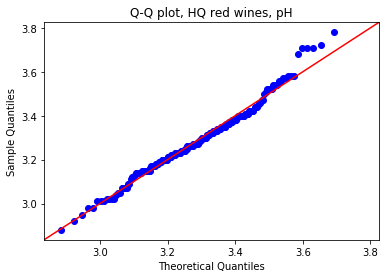

In [378]:
sm.qqplot(red["pH"],dist=norm(red["pH"].mean(),red["pH"].std()),line="45")
plt.title("Q-Q plot, all red wines, pH")
sm.qqplot(red_low["pH"],dist=norm(red_low["pH"].mean(),red_low["pH"].std()),line="45")
plt.title("Q-Q plot, LQ red wines, pH")
sm.qqplot(red_high["pH"],dist=norm(red_high["pH"].mean(),red_high["pH"].std()),line="45")
plt.title("Q-Q plot, HQ red wines, pH")
plt.show()

## Part 2: Normality Tests

Recommended reading: https://www.researchgate.net/publication/309743593_Comprehensive_comparison_of_normality_tests_Empirical_study_using_many_different_types_of_data

### Test 1 - D'Agostino-Pearson Test

<div>
D'Agostino-Pearson test computes the skewness and kurtosis to quantify how far the distribution is from Gaussian in terms of symmetry and shape. Then, it calculates how far each of these values differes from the value expected with the Gaussian distribution, and computes a single p-value from the sum of the squares of these discrepancies.
</div>

In [379]:
from scipy.stats import normaltest
from scipy.stats import skewtest
from scipy.stats import kurtosistest

#### Step 1 - Test the skewness (the third moment)

Skewness is the measure of symmetry. A symmetrical distribution has a skewness of zero, positively-skewed distribution is assymetrically distributed to the right, and negatively-skewed distribution is assymetrically distributed to the left. The normal distribution has a skewness of zero. The skewness test is based on the fact that when the data is normally distributed, the test statistic, z = skew/std has a standard normal distribution.

In [380]:
from scipy.stats import skew

In [381]:
def skew_imp(data):
    cubic_diffs = 0
    data = np.asarray(data)
    mean = data.mean()
    std = data.std()
    n = data.shape[0]
    for x in data:
        cubic_diffs += (x-mean)**3
    return (cubic_diffs/n)/std**3

In [382]:
print(skew(red["pH"]),skew_imp(red["pH"]),skew(red_low["pH"]),skew_imp(red_low["pH"]),skew(red_high["pH"]),skew_imp(red_high["pH"]))

0.19350175891005525 0.1935017589100549 -0.2988901597788287 -0.29889015977882843 0.3611907242905178 0.3611907242905177


In [383]:
print(skew(normal_1599),skew_imp(normal_1599),skew(normal_63),skew_imp(normal_63),skew(normal_217),skew_imp(normal_217))

-0.027505821256451714 -0.027505821256452713 0.006244899536959557 0.006244899536959396 -0.09565127806252248 -0.09565127806252298


Calculate the test statistic for the skewness test. In the case of normal distribution, the test statistic distribution is the standard normal distribution.

In [384]:
def skewness_statistic(data):
    n = data.shape[0]
    skew = skew_imp(data)
    se = np.sqrt((6*n*(n-1))/((n-2)*(n+1)*(n+3)))
    return skew/se

In [385]:
skewness_statistic(red["pH"]),skewness_statistic(red_low["pH"]),skewness_statistic(red_high["pH"])

(3.1618435559363083, -0.9910526903100734, 2.1870717865788256)

In [386]:
skewtest(red["pH"])[0],skewtest(red_low["pH"])[0],skewtest(red_high["pH"])[0]

(3.1449483049718125, -1.04435276253659, 2.180322805255903)

In [387]:
print(skewness_statistic(normal_1599),skewness_statistic(normal_63),skewness_statistic(normal_217))

-0.44944864677367946 0.0207066853301543 -0.5791848946610453


In [388]:
skewtest(normal_1599)[0],skewtest(normal_63)[0],skewtest(normal_217)[0]

(-0.45102646716115874, 0.022163989326773187, -0.5924287469012036)

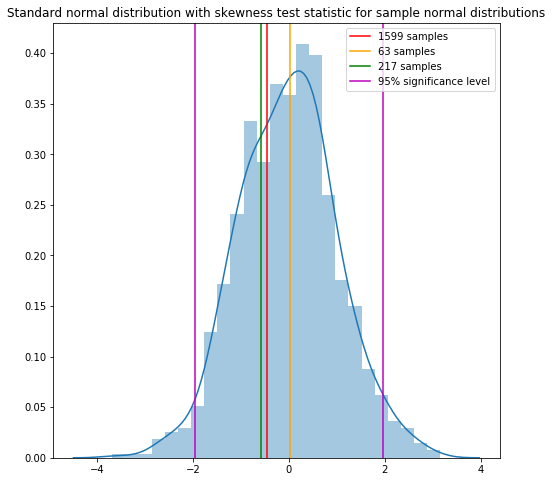

In [389]:
plt.figure(figsize=[8,8])
sbn.distplot(np.random.normal(0,1,1000))
plt.title("Standard normal distribution with skewness test statistic for sample normal distributions")
plt.axvline(skewness_statistic(normal_1599),color='r',label="1599 samples")
plt.axvline(skewness_statistic(normal_63),color='orange',label="63 samples")
plt.axvline(skewness_statistic(normal_217),color='g',label="217 samples")
plt.axvline(1.96,label="95% significance level",color="m")
plt.axvline(-1.96,color="m")
plt.legend()
plt.show()

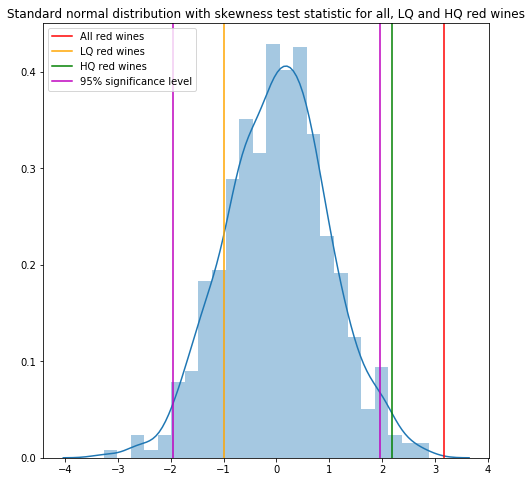

In [390]:
plt.figure(figsize=[8,8])
sbn.distplot(np.random.normal(0,1,1000))
plt.title("Standard normal distribution with skewness test statistic for all, LQ and HQ red wines")
plt.axvline(skewness_statistic(red["pH"]),color='r',label="All red wines")
plt.axvline(skewness_statistic(red_low["pH"]),color='orange',label="LQ red wines")
plt.axvline(skewness_statistic(red_high["pH"]),color='g',label="HQ red wines")
plt.axvline(1.96,label="95% significance level",color="m")
plt.axvline(-1.96,color="m")
plt.legend()
plt.show()

#### Step 2 - Test the kurtosis (the forth moment)

Kurtosis quantifies whether the tails of the data distribution matches the Gaussian distribution. 

In [391]:
from scipy.stats import kurtosis

In [392]:
def kurtosis_imp(data):
    quadratic_diffs = 0
    data = np.asarray(data)
    mean = data.mean()
    std = data.std()
    n = data.shape[0]
    for x in data:
        quadratic_diffs += (x-mean)**4
    return ((quadratic_diffs/n)/std**4)-3

In [393]:
print(kurtosis(red["pH"]),kurtosis_imp(red["pH"]),kurtosis(red_low["pH"]),kurtosis_imp(red_low["pH"]),kurtosis(red_high["pH"]),kurtosis_imp(red_high["pH"]))

0.8006714441211544 0.8006714441211704 2.5123035895283143 2.512303589528308 0.6415985332954985 0.6415985332954977


In [394]:
kurtosistest(red["pH"])[0],kurtosistest(red_low["pH"])[0],kurtosistest(red_high["pH"])[0]

(4.877909145375592, 2.8290872117404833, 1.8040594818177966)

In [395]:
kurtosistest(normal_1599)[0],kurtosistest(normal_63)[0],kurtosistest(normal_217)[0]

(-0.49153101267883625, -1.4172336403585284, -0.7719970497061673)

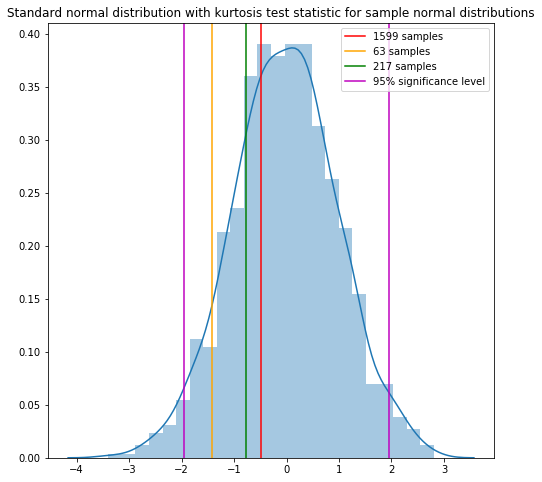

In [396]:
plt.figure(figsize=[8,8])
sbn.distplot(np.random.normal(0,1,1000))
plt.title("Standard normal distribution with kurtosis test statistic for sample normal distributions")
plt.axvline(kurtosistest(normal_1599)[0],color='r',label="1599 samples")
plt.axvline(kurtosistest(normal_63)[0],color='orange',label="63 samples")
plt.axvline(kurtosistest(normal_217)[0],color='g',label="217 samples")
plt.axvline(1.96,label="95% significance level",color="m")
plt.axvline(-1.96,color="m")
plt.legend()
plt.show()

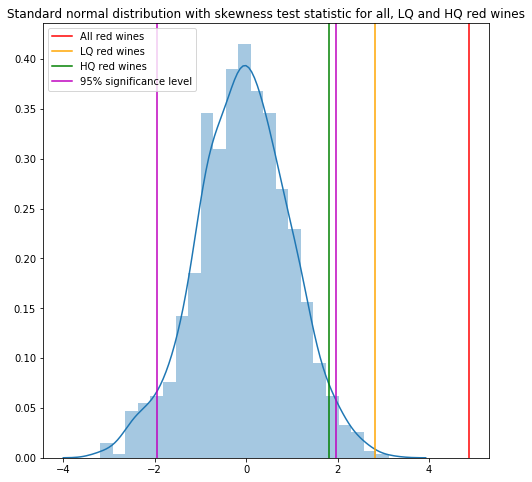

In [397]:
plt.figure(figsize=[8,8])
sbn.distplot(np.random.normal(0,1,1000))
plt.title("Standard normal distribution with skewness test statistic for all, LQ and HQ red wines")
plt.axvline(kurtosistest(red["pH"])[0],color='r',label="All red wines")
plt.axvline(kurtosistest(red_low["pH"])[0],color='orange',label="LQ red wines")
plt.axvline(kurtosistest(red_high["pH"])[0],color='g',label="HQ red wines")
plt.axvline(1.96,label="95% significance level",color="m")
plt.axvline(-1.96,color="m")
plt.legend()
plt.show()

#### Step 3: Perform the D'Agostino-Pearson Test

In [398]:
from scipy.stats import chi2

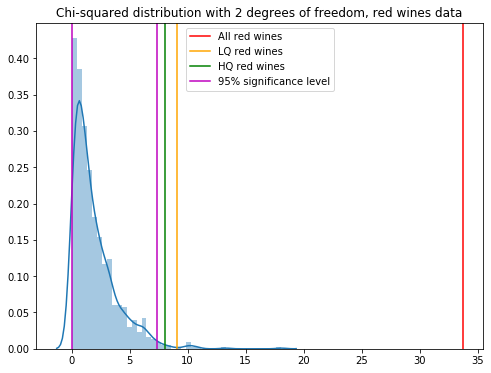

In [399]:
plt.figure(figsize=[8,6])
sbn.distplot(chi2.rvs(2,size=1000))
plt.axvline(normaltest(red["pH"])[0],label="All red wines",color="r")
plt.axvline(normaltest(red_low["pH"])[0],label="LQ red wines",color="orange")
plt.axvline(normaltest(red_high["pH"])[0],label="HQ red wines",color="g")
plt.axvline(chi2(2).ppf(0.975),label="95% significance level",color="m")
plt.axvline(chi2(2).ppf(0.025),color="m")
plt.title("Chi-squared distribution with 2 degrees of freedom, red wines data")
plt.legend()
plt.show()

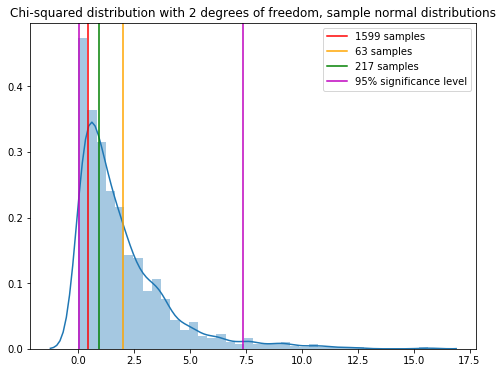

In [400]:
plt.figure(figsize=[8,6])
sbn.distplot(chi2.rvs(2,size=1000))
plt.axvline(normaltest(normal_1599)[0],label="1599 samples",color="r")
plt.axvline(normaltest(normal_63)[0],label="63 samples",color="orange")
plt.axvline(normaltest(normal_217)[0],label="217 samples",color="g")
plt.axvline(chi2(2).ppf(0.975),label="95% significance level",color="m")
plt.axvline(chi2(2).ppf(0.025),color="m")
plt.title("Chi-squared distribution with 2 degrees of freedom, sample normal distributions")
plt.legend()
plt.show()

In [465]:
normaltest(red["pH"]),normaltest(red_low["pH"]),normaltest(red_high["pH"])

(NormaltestResult(statistic=33.684697471483915, pvalue=4.8468645347727716e-08),
 NormaltestResult(statistic=9.094407144251349, pvalue=0.01059679616510233),
 NormaltestResult(statistic=8.008438149055667, pvalue=0.018238526628810484))

In [466]:
normaltest(normal_1599),normaltest(normal_63),normaltest(normal_217)

(NormaltestResult(statistic=0.4450276105049581, pvalue=0.80050395551473),
 NormaltestResult(statistic=2.009042433786764, pvalue=0.36621993275292736),
 NormaltestResult(statistic=0.946951264909957, pvalue=0.6228337607651433))

### Test 2 - Shapiro-Wilk Test

Further information on the test statistic and the test itself can be found at https://www.researchgate.net/publication/309743593_Comprehensive_comparison_of_normality_tests_Empirical_study_using_many_different_types_of_data.

In [402]:
from scipy.stats import shapiro

In [403]:
def shapiro_imp(data):
    square_diffs = 0
    data = np.asarray(data)
    n = data.shape[0]
    mean = data.mean()
    for x in data:
        square_diffs += (x-mean)**2
    mse = square_diffs/n 
    m = np.zeros(n)
     

In [404]:
shapiro(red["pH"]),shapiro(red_low["pH"]),shapiro(red_high["pH"])

((0.993486762046814, 1.7136950418716879e-06),
 (0.9542158842086792, 0.019917160272598267),
 (0.9834030866622925, 0.011939547955989838))

In [405]:
shapiro(normal_1599),shapiro(normal_63),shapiro(normal_217)

((0.9983533024787903, 0.12007781863212585),
 (0.9829570055007935, 0.532106876373291),
 (0.9931395053863525, 0.4136943519115448))

### Test 3 - Kolmogorov-Smirnov Test

Kolmogorov-Smirnov test checks if the sample distribution fits the CDF of the given distribution (normal distribution in our case). The test statistic for the test is the supremum (the least upper bound) of the set distances between the theoretical and actual distributions. However, there are certain limitations of the test that limit its practical applications:

<ol>
    <li>KS test only applies to continuous distributions</li>
    <li>Tends to be more sensitive near the centre of the distribution rather than at the tails - this means that although even small deviations at the tails of the distributions can signal the difference from the theoretical distribution, the KS test equates the importance of differences at the centre and at the tails</li>
    <li>The theoretical distribution must be fully specified, hence the mean, and the standard deviation parameters must be known (i.e. not calculated from the sample data!!!)</li>
</ol>

source: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm

Note: because of the third limitation, the Kolmogorov-Smirnov test should not be valid in our case, as we specify the parameters of the theoretical distribution based on the sample data.

In [408]:
from scipy.stats import kstest

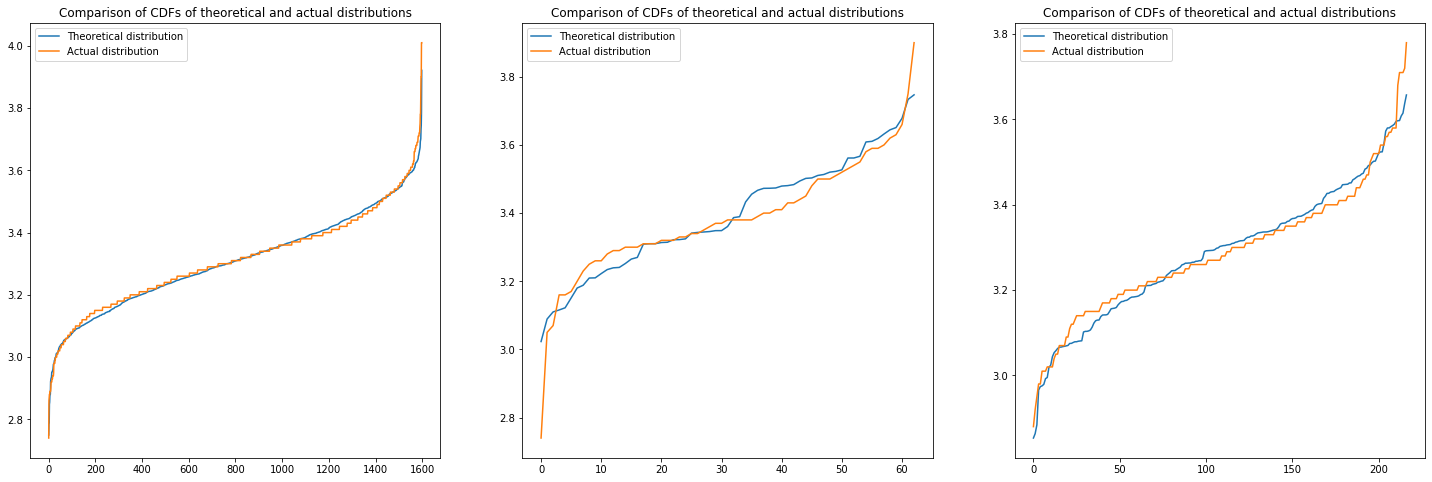

In [456]:
plt.figure(figsize=[25,8])

plt.subplot(1,3,1)
plt.plot(normal_1599,label="Theoretical distribution")
plt.plot(sorted(red["pH"]),label="Actual distribution")
plt.title("Comparison of CDFs of theoretical and actual distributions")
plt.legend()

plt.subplot(1,3,2)
plt.plot(normal_63,label="Theoretical distribution")
plt.plot(sorted(red_low["pH"]),label="Actual distribution")
plt.title("Comparison of CDFs of theoretical and actual distributions")
plt.legend()

plt.subplot(1,3,3)
plt.plot(normal_217,label="Theoretical distribution")
plt.plot(sorted(red_high["pH"]),label="Actual distribution")
plt.title("Comparison of CDFs of theoretical and actual distributions")
plt.legend()

plt.show()

In [454]:
kstest(red["pH"],norm(red["pH"].mean(),red["pH"].std()).cdf),kstest(red_low["pH"],norm(red_low["pH"].mean(),red_low["pH"].std()).cdf),kstest(red_high["pH"],norm(red_high["pH"].mean(),red_high["pH"].std()).cdf)

(KstestResult(statistic=0.040368454197074355, pvalue=0.010604884802440944),
 KstestResult(statistic=0.10496409621692793, pvalue=0.46597119089175126),
 KstestResult(statistic=0.059607962745335086, pvalue=0.4113541874393366))

In [455]:
kstest(normal_1599,norm(red["pH"].mean(),red["pH"].std()).cdf),kstest(normal_63,norm(red_low["pH"].mean(),red_low["pH"].std()).cdf),kstest(normal_217,norm(red_high["pH"].mean(),red_high["pH"].std()).cdf)

(KstestResult(statistic=0.02042484079392337, pvalue=0.5171649627409465),
 KstestResult(statistic=0.11042284150207249, pvalue=0.40024043256242076),
 KstestResult(statistic=0.048020297345222285, pvalue=0.7123823971917221))

### Test 4 - Anderson-Darling Test

The Anderson-Darling test is the modification of the Kolmogorov-Smirnov test, which was developed to address some limitations of the latter test. The main difference is that the Anderson-Darling test gives more weight to the tails of the distribution, unlike the KS test, which does not differ between the differences at the centre and at the tails.

In [459]:
from scipy.stats import anderson

In [460]:
anderson(red["pH"]),anderson(red_low["pH"]),anderson(red_high["pH"])

(AndersonResult(statistic=1.8641116106432492, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])),
 AndersonResult(statistic=0.8086981146405705, critical_values=array([0.545, 0.621, 0.744, 0.868, 1.033]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])),
 AndersonResult(statistic=1.0104986663271234, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])))

In [462]:
anderson(normal_1599),anderson(normal_63),anderson(normal_217)

(AndersonResult(statistic=0.49177703792952343, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])),
 AndersonResult(statistic=0.4025278644756014, critical_values=array([0.545, 0.621, 0.744, 0.868, 1.033]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])),
 AndersonResult(statistic=0.31929177731103664, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])))

### Test 5 - Lilliefors Test

The Lilliefors test is another modification of the Kolmogorov-Smirnov test, which allows the mean and the standard deviation of the theoretical distribution to be estimated from the data. 

In [468]:
sm.stats.diagnostic.lilliefors(red["pH"]),sm.stats.diagnostic.lilliefors(red_low["pH"]),sm.stats.diagnostic.lilliefors(red_high["pH"])

((0.04036845419707158, 2.2440475295577305e-06),
 (0.1049640962169297, 0.08171930653429459),
 (0.05960796274533897, 0.058821639505239956))

### Conlusion

The null hypothesis: the data is normally distributed

Significance level - 5%

<table border=2>
    <tr>
        <th>Sample</th>
        <th>D'Agostino-Pearson Test</th>
        <th>Shapiro-Wilk Test</th>
        <th>Anderson-Darling Test</th>
        <th>Lilliefors Test</th>
    </tr>
    <tr> 
        <th>All red wines</th>
        <th>Rejected</th>
        <th>Rejected</th>
        <th>Rejected</th>
        <th>Rejected</th>
    </tr>
     <tr> 
        <th>Low-quality red wines</th>
        <th>Rejected</th>
        <th>Rejected</th>
        <th>Rejected</th>
        <th>Accepted</th>
    </tr>
    <tr> 
        <th>High-quality red wines</th>
        <th>Rejected</th>
        <th>Rejected</th>
        <th>Rejected</th>
        <th>Accepted</th>
    </tr>    
</table>

Significance level - 1%

<table border=2>
    <tr>
        <th>Sample</th>
        <th>D'Agostino-Pearson Test</th>
        <th>Shapiro-Wilk Test</th>
        <th>Anderson-Darling Test</th>
        <th>Lilliefors Test</th>
    </tr>
    <tr> 
        <th>All red wines</th>
        <th>Rejected</th>
        <th>Rejected</th>
        <th>Rejected</th>
        <th>Rejected</th>
    </tr>
     <tr> 
        <th>Low-quality red wines</th>
        <th>Accepted</th>
        <th>Accepted</th>
        <th>Accepted</th>
        <th>Accepted</th>
    </tr>
    <tr> 
        <th>High-quality red wines</th>
        <th>Accepted</th>
        <th>Accepted</th>
        <th>Accepted</th>
        <th>Accepted</th>
    </tr>    
</table>

## Part 3: Two-sample Tests 

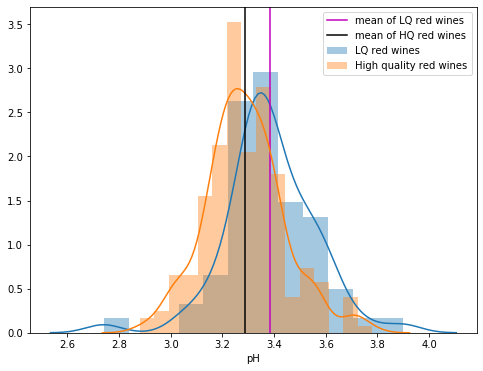

In [542]:
plt.figure(figsize=[8,6])

sbn.distplot(red_low["pH"],label="LQ red wines")
plt.axvline(red_low["pH"].mean(),label="mean of LQ red wines",color="m")
sbn.distplot(red_high["pH"],label="High quality red wines")
plt.axvline(red_high["pH"].mean(),label="mean of HQ red wines",color="k")
plt.legend()

plt.show()

Note: to allow the visual comparison of two CDFs, 63 samples were randomly taken from the set of high-quality red wines to match the size of the set of the low-quality red wines. 

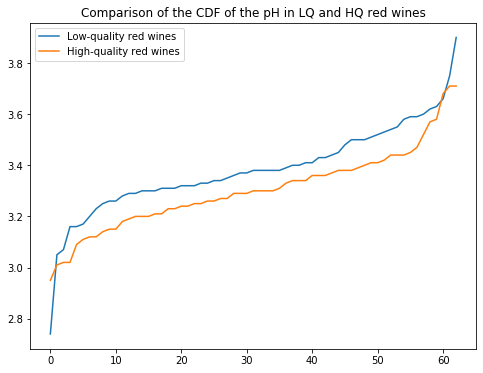

In [547]:
plt.figure(figsize=[8,6])
plt.plot(sorted(red_low["pH"]),label="Low-quality red wines")
plt.plot(sorted(red_high["pH"].sample(red_low["pH"].shape[0])),label="High-quality red wines")
plt.title("Comparison of the CDF of the pH in LQ and HQ red wines")
plt.legend()
plt.show()

### Test 1 - Independent t-test (two independent samples)

The independent t-test checks whether the means of two samples are statistically significantly different from each other. The test relies on some assumtions:

Note: independent variable - quality of wine (high or low), dependent variable - pH.

<ol>
    <li>The two samples are independent</li>
    <li>The dependent variable is approximately normally distributed (checked in the previous part)</li>
    <li>The variance of the dependent variable is approximately the same for both samples (approximately true in our case)</li>
<ol>

In [532]:
from scipy.stats import ttest_ind

The standard deviations of the dependent variable (i.e. pH) for low-quality and high-quality wines:

In [533]:
red_low["pH"].std(),red_high["pH"].std()

(0.1751002931100043, 0.15447774140366982)

In [534]:
ttest_ind(red_low["pH"],red_high["pH"])

Ttest_indResult(statistic=4.181091608252266, pvalue=3.891521473549619e-05)

### Test 2 - Mann-Whitney Rank Test

The Mann-Whitney Rank test is a nonparametric test (i.e. does not assume an underlying distribution) for two independent samples that tests whether for two populations, the two values X (taken from population 1) and Y (taken from population 2), the probability of X being bigger than Y is the same as the probability of Y being bigger than X.

The U statistic is the sum, which is calculated as follows: 

for each pair of samples from X and Y:
<ul>
    <li>if X = Y, add 1/2 to U</li>
    <li>if X > Y, add 1 to U</li>
    <li>else don't add anything to U</li>
</ul>

In [535]:
from scipy.stats import mannwhitneyu

In [536]:
mannwhitneyu(red_low["pH"],red_high["pH"],alternative="two-sided")

MannwhitneyuResult(statistic=9361.0, pvalue=8.039486777268166e-06)

### Test 3 - Kolmogorov-Smirnov Two-Sample Test

The null hypothesis of this test is that both samples come from the same distribution. 

In [487]:
from scipy.stats import ks_2samp

In [488]:
ks_2samp(red_low["pH"],red_high["pH"])

Ks_2sampResult(statistic=0.3277009728622632, pvalue=3.6895793489755135e-05)